# Sales Analysis on Electronics Gadgets In a Store

### Importing libraries needed

In [1]:
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

###  Converting the 12 months of  data sales  into a single csv file.

In [2]:
df = pd.read_csv("./SalesAnalysis/Sales_Data/Sales_April_2019.csv")
# listing the csv files in a document
files = [file for file in os.listdir("./SalesAnalysis/Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
      
all_months_data.to_csv("all_data.csv",index=False)


###  Viewing the first and last five  rows of the  merged csv file

In [3]:
all_data= pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"



##  Cleaning up the data :

### Drop all rows that contain null values

In [9]:
new_df = all_data[all_data.isna().any(axis=1)]
new_df.head()

all_data=all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


###  Additional Cleaning in the data in the order date

In [10]:
all_data= all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


###  Extracting the month from the order date

In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Converting columns to their correct data_type

In [12]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


###  Extracting city and its corresponding state from the purchase address

In [13]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA)


In [14]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99



###  Question 1: What was the best month for sales? How much was earned that month?



In [76]:
sales_plot = all_data.groupby('Month').sum()
sales_plot

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1811768.38,1822256.73,139485,282440
2,13449,2188884.72,2202022.42,172669,354885
3,17005,2791207.83,2807100.38,218969,447559
4,20558,3367671.02,3390670.24,262259,544186
5,18667,3135125.13,3152606.75,238780,487899
6,15253,2562025.61,2577802.26,195528,402436
7,16072,2632539.56,2647775.76,206169,417349
8,13448,2230345.42,2244467.88,172289,353857
9,13109,2084992.09,2097560.13,168513,341698


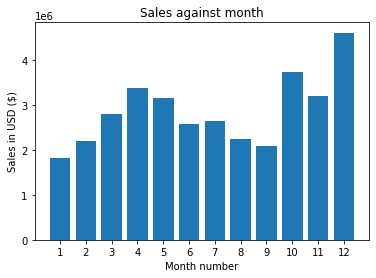

In [77]:
import matplotlib.pyplot as plt
months = range (1, 13)
plt.bar(months, sales_plot['Sales'])
plt. xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Sales against month')
plt.show()

From the bar graph, it is seen that December recorded the highest sales which is $4,613,443.34 compared to the other months.

### Question 2: What city had the highest number of sales


In [78]:
city_sales = all_data.groupby('City').sum()
city_sales

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta(GA),16602,2779908.20,104794,2795498.58,214264,442932
Austin(TX),11153,1809873.61,69829,1819581.75,141946,289060
Boston(MA),22528,3637409.77,141112,3661642.01,288225,590442
Dallas(TX),16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles(CA),33289,5421435.23,208325,5452570.80,427444,866638
New York City(NY),27932,4635370.83,175741,4664317.43,357696,733598
Portland(ME),2750,447189.25,17144,449758.27,35211,72856
Portland(OR),11303,1860558.22,70621,1870732.34,144421,295533
San Francisco(CA),50239,8211461.74,315520,8262203.91,643265,1319477


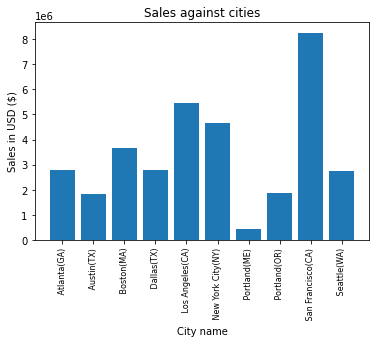

In [79]:
import matplotlib.pyplot as plt

cities=[city for city, df in all_data.groupby('City')]

plt.bar(cities, city_sales['Sales'])
plt. xticks(cities, rotation ='vertical', size= 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.title('Sales against cities')
plt.show()

San Francisco recorded the highest sales. This maybe due to factors such as  the econimic standard, the users or the rate of  advertisements.

### Question3 : What times should we display advertisements to maximumize likelihood of customer's buying  product 

In [63]:
all_data['Order Date'] =pd.to_datetime(all_data['Order Date'])

In [64]:
all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,9,27


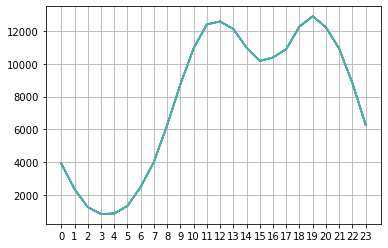

In [65]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

The peaks times people make orders are around 11 am and 7pm. Adertisements should always before peaktimes. For example at 8 to 10am and 5 to 7pm respectively. 

### Question 4: What products are most often sold together?

In [66]:
new_df= all_data[all_data['Order ID'].duplicated(keep=False)]
new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
new_df = new_df[['Order ID', 'Grouped']].drop_duplicates()
new_df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [67]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key,value)                      

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


 This gives insights with promotions taking into consideration the products that are mostly ordered as a pair. From the table above we can see that highest ordered pair is  iPhone and Lightninh Charging Cable


### Question 5: What product sold the most? Why do you think sold the most?

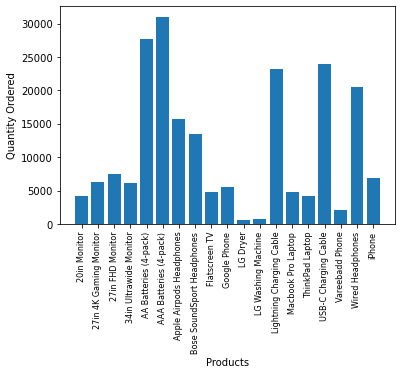

In [68]:
product_data = all_data.groupby('Product')
quantity_ordered= product_data.sum()['Quantity Ordered']

products=[product for product, df in  product_data]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation ='vertical', size= 8)
plt.ylabel("Quantity Ordered")
plt.xlabel('Products')
plt.show()

From the graph  the AA Batteries (4packs) had the high purchase because it was cheap. However, we can test the hypothesis assuming it recorded the highest sales because they are cheap.

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


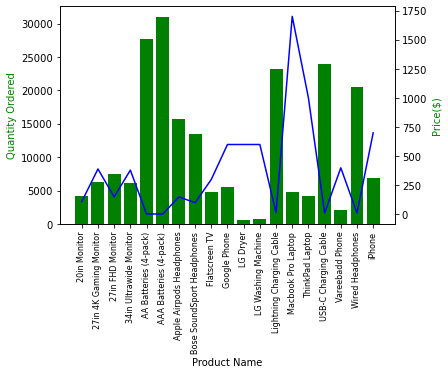

In [69]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

fig, ax1 = plt.subplots()

ax2= ax1.twinx()
ax1.bar(products,quantity_ordered,  color ='g')
ax2.plot(products, prices, "b-")

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color ='g')
ax2.set_ylabel('Price($)', color ='g')
ax1.set_xticklabels(products, rotation ='vertical', size =8 )
plt.show()

This graph compares the quantity rodered of an item along its price.This graph proves the price of the AA Batteries is relatively cheap compared to the other gadgets which contributes to its high purchase.